# Hypothesis Generation

Hypothesis: Gender plays a strong role in loan approval, namely men are more likely to get accepted for loans.

# Data Exploration

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
os.chdir('/Users/calebward/LHL_project_IV')
df = pd.read_csv("data/data.csv") 

## First Look

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df.shape

(614, 13)

In [50]:
print('Missing Values')
print(df.isna().any())

Missing Values
Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Only Loan_ID, Education, ApplicantIncome, CoapplicantIncome, Property_Area, and Loan_Status have no missing values.

This leads to a new a hypothesis: These features are the main drivers of loan approval.

As Loan_ID is not missing values we can check for duplicates as a check on duplicate entries.
This works as a good check as we may not want to remove duplicate rows as it may be the same person applying for the same loan again.

In [52]:
print(f'There are no duplicate loan IDs: {len(df.Loan_ID.drop_duplicates()) == len(df.Loan_ID)}')

There are no duplicate loan IDs: True


We can also see that 'Loan_ID' acts as a unique table key and won't contribute to our analysis beyond identification.

In [53]:
df.set_index('Loan_ID', inplace = True)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Our first look reveals that a number of columns are missing entries. Some, like Loan_Amount_Term missing for a denied loan, may be explained and can be filled with a set logical value. The others will need some sort of imputer to fill in their values. We want to avoid dropping NaN values due to the size of the dataset.

In [55]:
categorical_features = df.select_dtypes(exclude="number").columns.tolist()
quantitative_features = df.drop(categorical_features, axis = 1).columns.tolist()

print(f'quantitative features: {quantitative_features}')
print(f'categorical features: {categorical_features}')

quantitative features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


## Data Audit: Examining NaN Values

In [56]:
for col in df[categorical_features]:
    print(f'{col} : {df[col].unique()}')

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Loan_Status : ['Y' 'N']


In [57]:
df.loc[df.LoanAmount.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y


In [58]:
df.loc[df.Loan_Amount_Term.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y


Missing Loan Amount data does NOT mean that the loan was denied or that someone was denied a loan before the details of the loan were understood (No one was turned away at the door).

This is further collaborated by looking at the NaN terms for Loan_Amount_Term. We would expect to see both Loan Amount and Loan Term be NaN if someone was denied right away.

In [59]:
df.loc[df.Credit_History.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y


In [60]:
df.loc[df.Gender.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N


In [61]:
df.loc[df.Married.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


Now here is something interesting! All Married NaN have a matching Dependents NaN. This seems to imply these are single people. We may want to enter 'No' and 0 respectively for these rows.

We can see below that the inverse is not true though regarding Dependent NaN values.

In [62]:
df.loc[df.Dependents.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y


In [63]:
df.loc[df.Self_Employed.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y


There are a number of NaN values within our dataset and they are sparcely scattered throughout (rows are mostly filled with data with only a handful of missing values)

## Data Audit: Examining Outliers

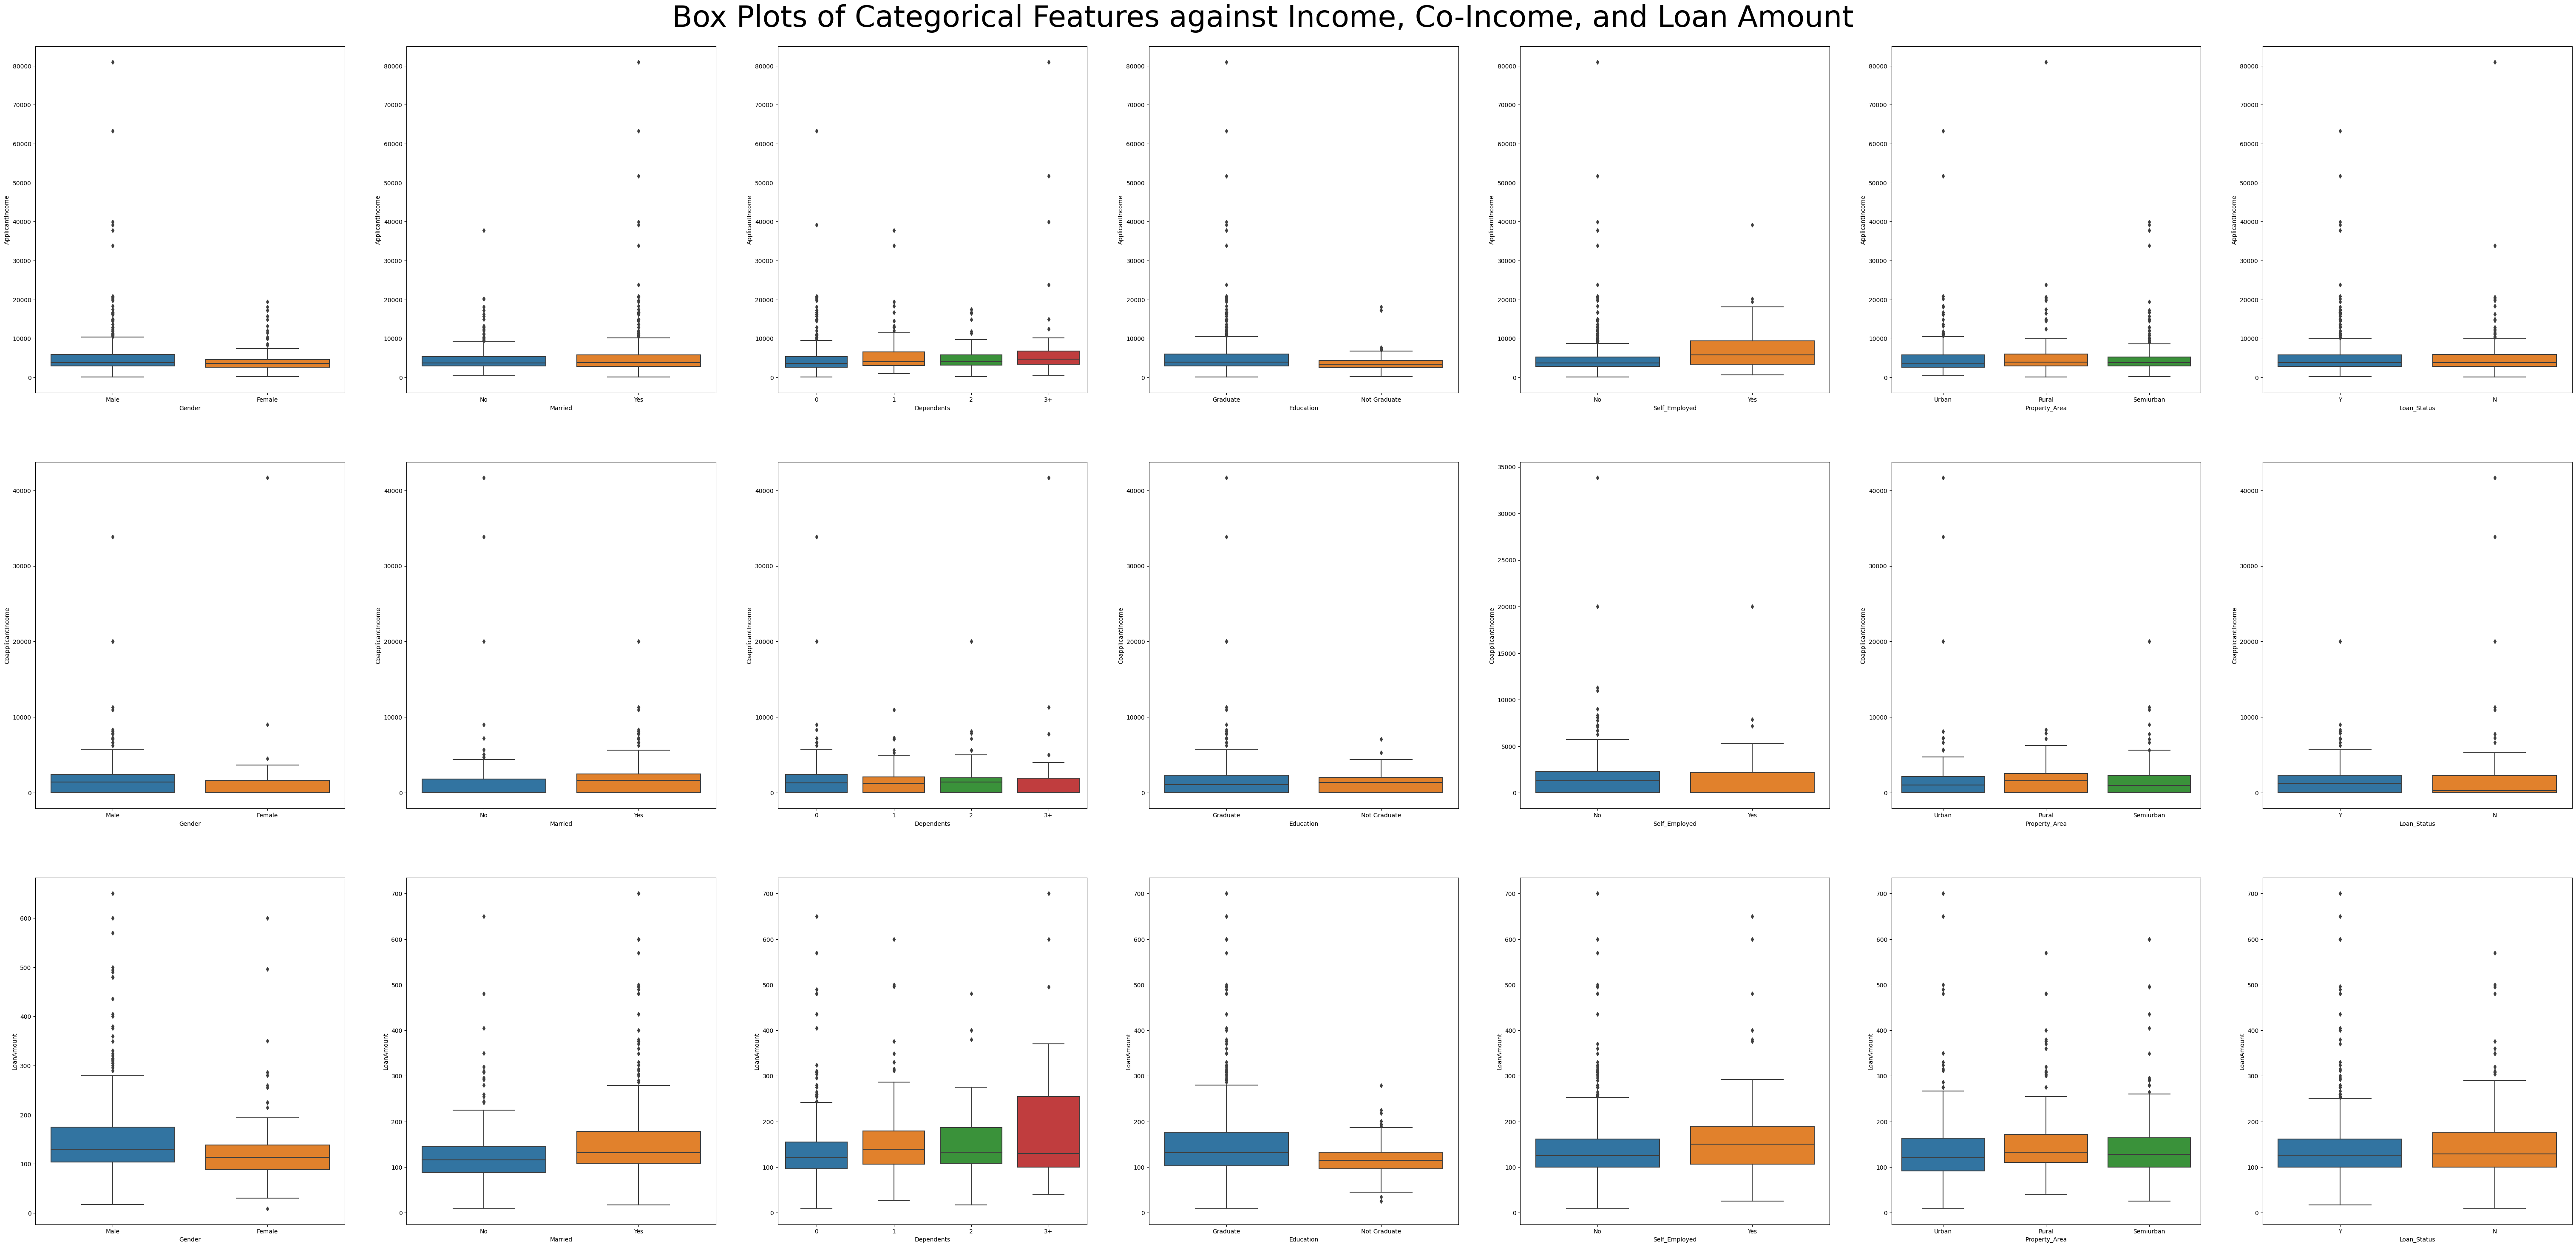

In [64]:
fig, axes = plt.subplots(3, 7, figsize = (7*11, 3*11))
fig.suptitle('Box Plots of Categorical Features against Income, Co-Income, and Loan Amount', size = 50)
for i, x in enumerate(categorical_features):
    for j, y in enumerate(['ApplicantIncome','CoapplicantIncome','LoanAmount']):
        sns.boxplot(ax = axes[j, i], data = df, x = x, y = y)

plt.subplots_adjust(top=0.95)
plt.show()

Though you may have to zoom to see details (I've combined them to help trim the length of this notebook), it isn't hard to see we have a number of outliers across a broad range of categories

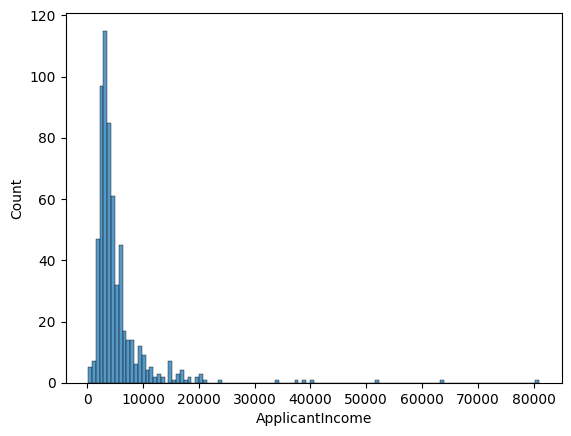

In [65]:
sns.histplot(df.ApplicantIncome)
plt.show()

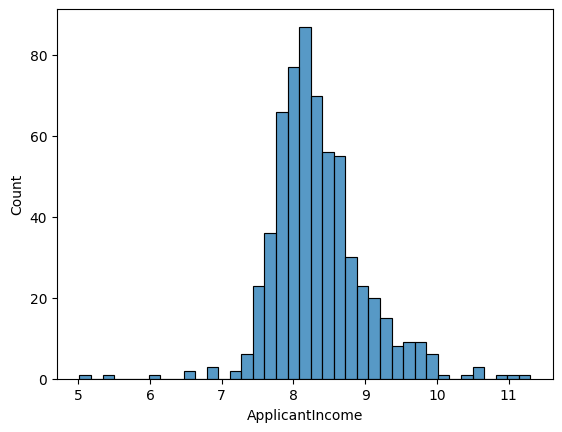

In [66]:
from src.modules import helper

sns.histplot(helper.log_transform(df.ApplicantIncome))
plt.show()

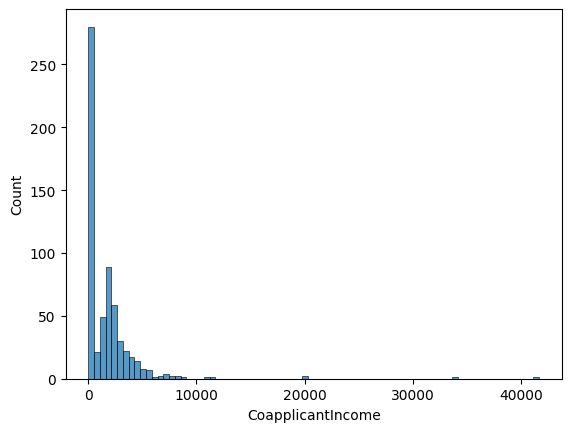

In [67]:
sns.histplot(df.CoapplicantIncome)
plt.show()

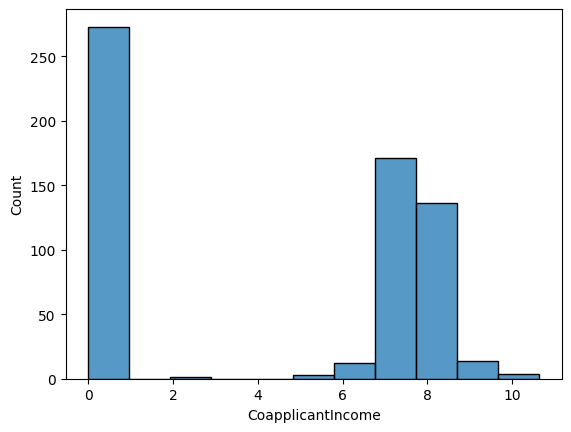

In [68]:
sns.histplot(helper.log_transform(df.CoapplicantIncome))
plt.show()

Well, it looks like we'll have a normal distribution once we drop the $0 co-applicant incomes (people w/o co-applicants)

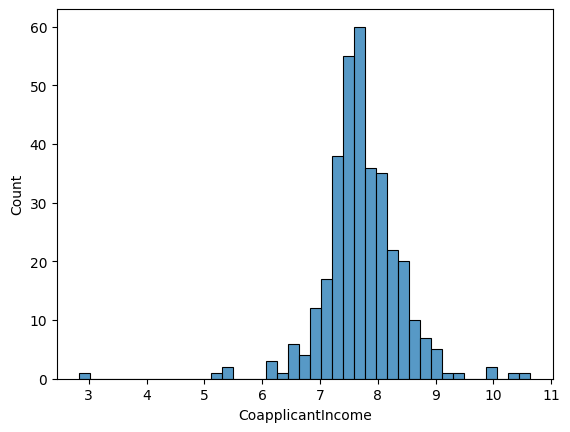

In [69]:
sns.histplot(helper.log_transform(df.loc[df.CoapplicantIncome!=0].CoapplicantIncome))
plt.show()

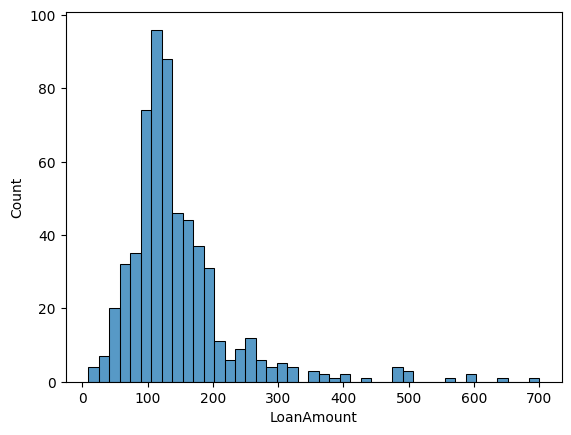

In [70]:
sns.histplot(df.LoanAmount)
plt.show()

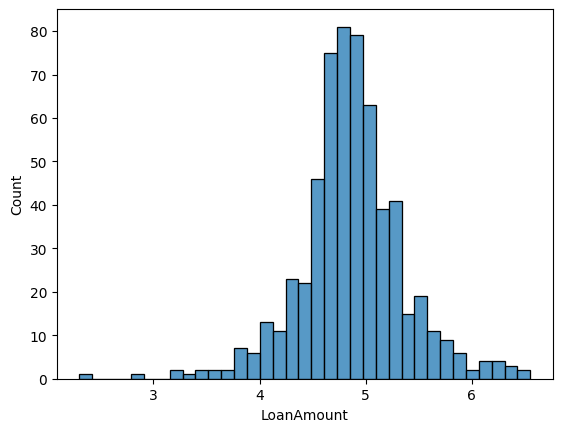

In [71]:
sns.histplot(helper.log_transform(df.LoanAmount))
plt.show()

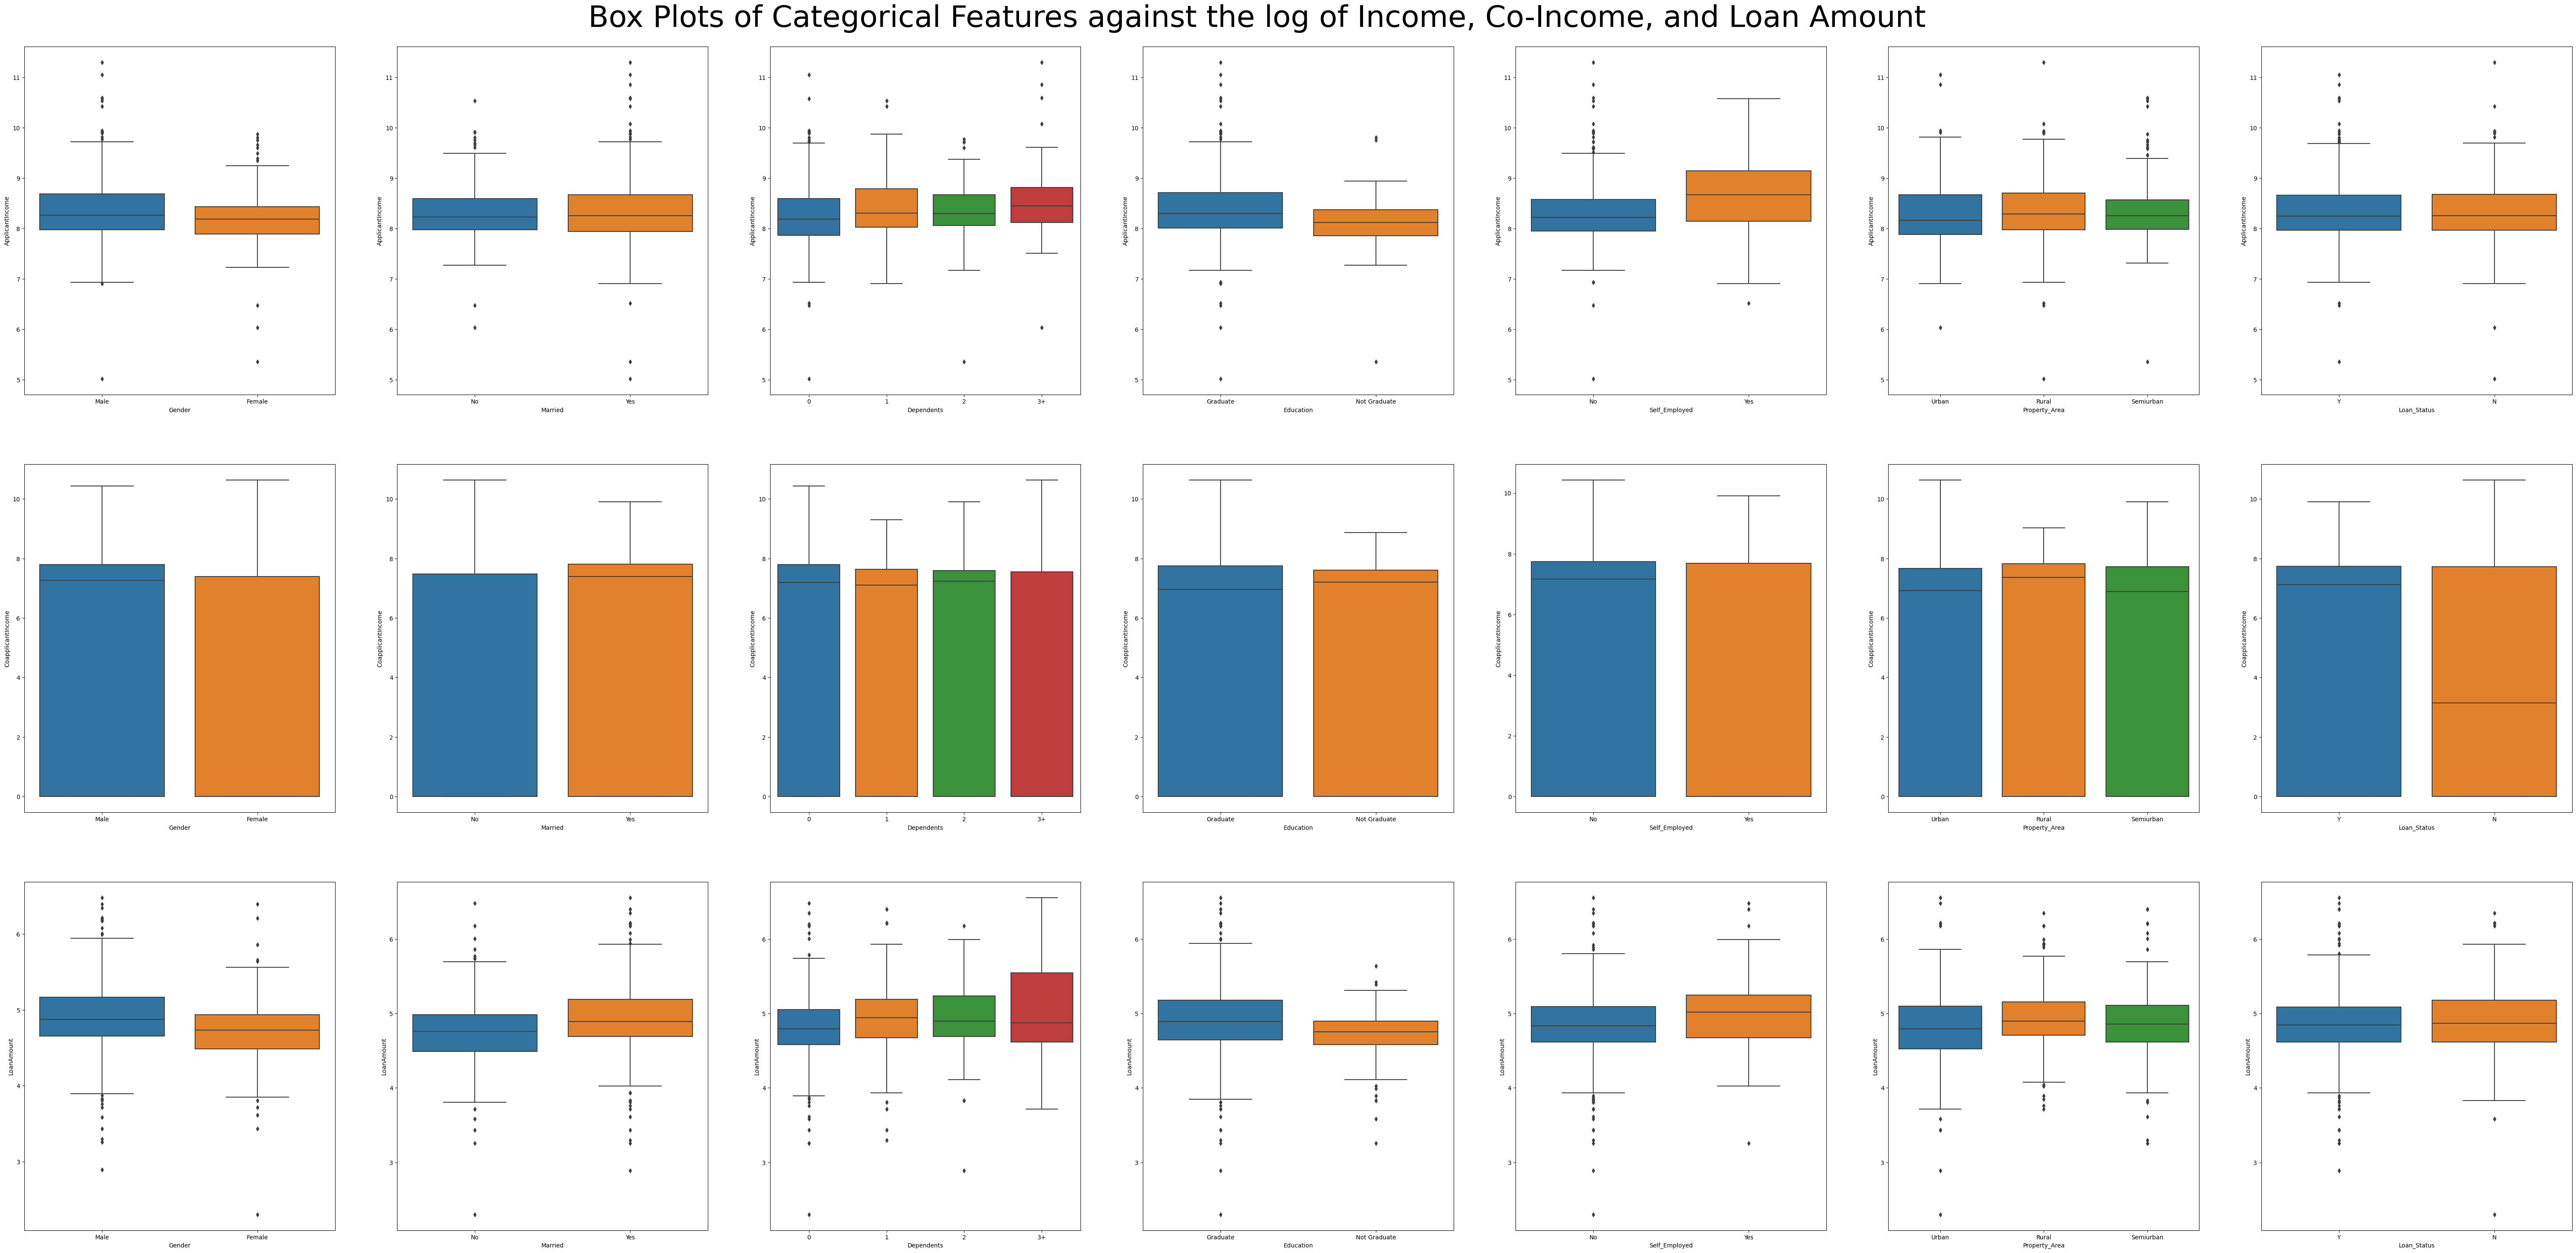

In [72]:
fig, axes = plt.subplots(3, 7, figsize = (7*11, 3*11))
fig.suptitle('Box Plots of Categorical Features against the log of Income, Co-Income, and Loan Amount', size = 50)
df_log = df.copy()
df_log[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = helper.log_transform(df_log[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
for i, x in enumerate(categorical_features):
    for j, y in enumerate(['ApplicantIncome','CoapplicantIncome','LoanAmount']):
        sns.boxplot(ax = axes[j, i], data = df_log, x = x, y = y)

plt.subplots_adjust(top=0.95)
plt.show()

Much better bar plots with fewer and less extreme outliers

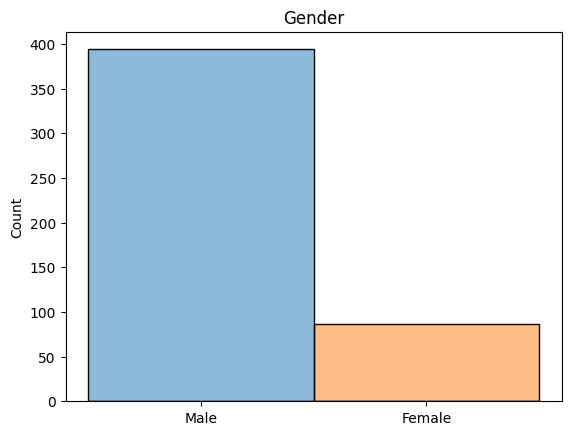

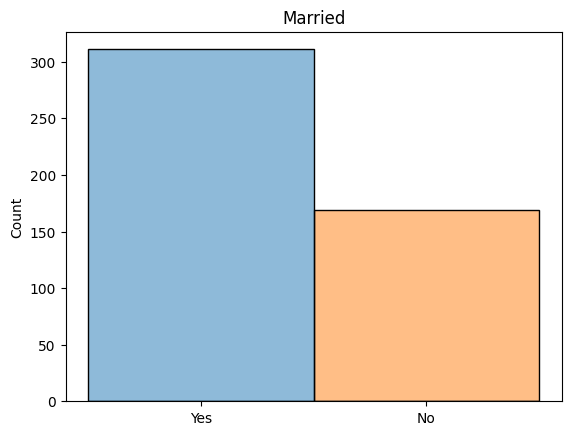

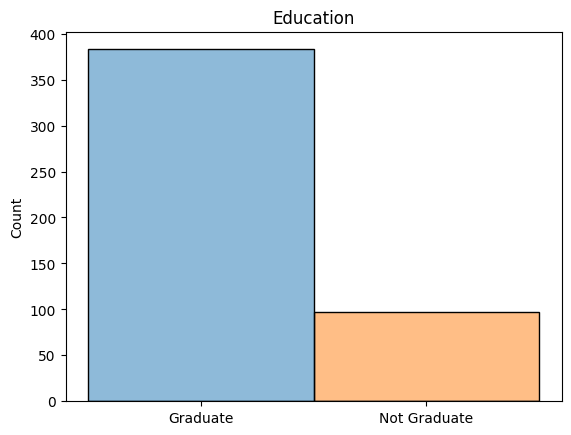

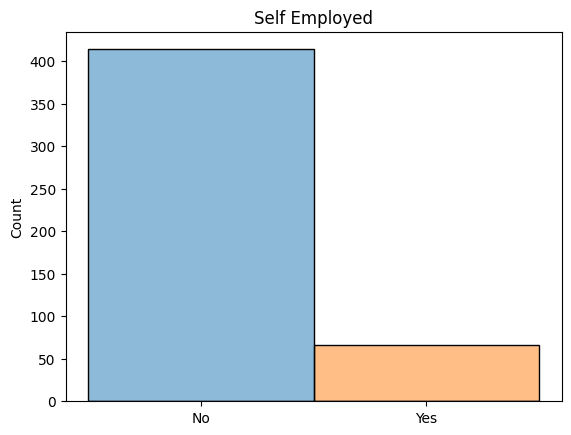

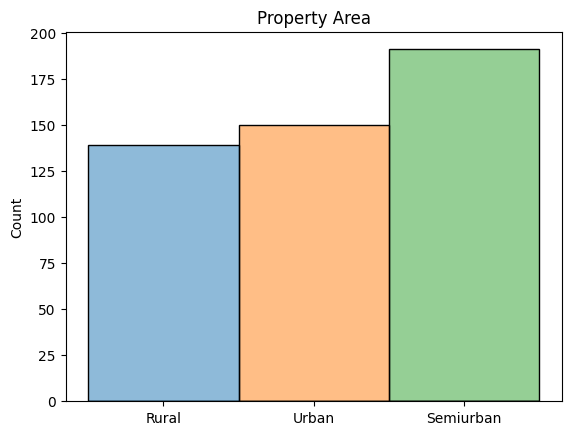

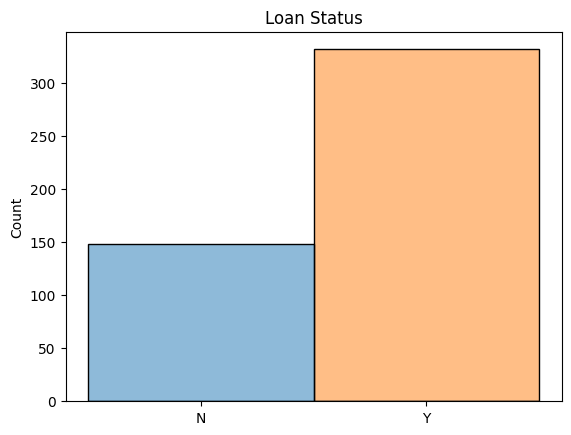

In [108]:
for col in df[['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']]:
    sns.histplot(df.dropna(), x=col, hue=col)
    plt.title(col.replace('_',' '))
    plt.xlabel('')
    plt.legend('',frameon=False)
    plt.show()

Looking at these histograms we can see we have some fairly skewed data

## Data Cleaning for EDA

We will want to do most of our data cleaning for our models within a pipeline so we will only do a little here.

In [88]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
import numpy as np

In [74]:
df_log.loc[df_log.Married.isna(),'Married'] = 'No'

In [75]:
df_log.loc[df_log.Married.isna(),'Dependents'] = 0

In [94]:
df_log.dropna(inplace=True)

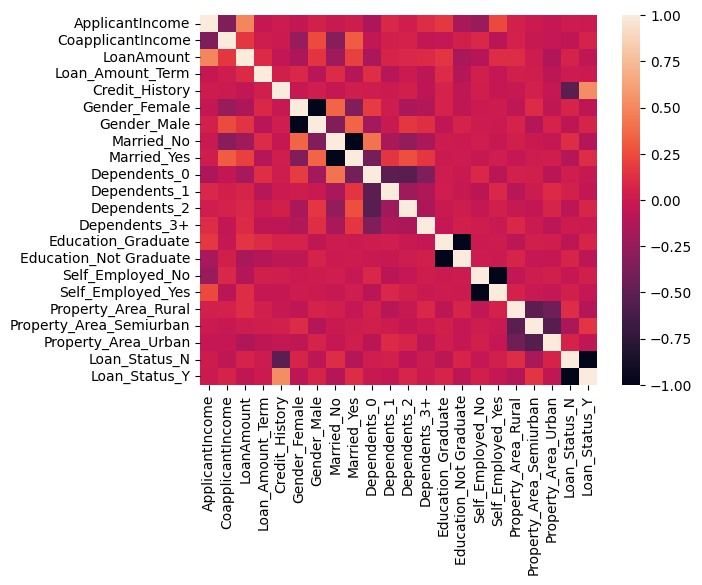

In [103]:
sns.heatmap(pd.get_dummies(df_log).corr())
plt.show()

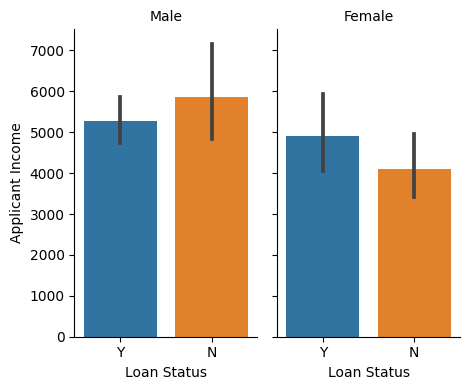

In [110]:
g = sns.catplot(
    data=df,
    x="Loan_Status",
    y="ApplicantIncome",
    col="Gender",
    kind="bar",
    height=4,
    aspect=0.6
)
g.set_axis_labels('Loan Status', 'Applicant Income')
g.set_titles('{col_name}')
plt.show()